<a href="https://colab.research.google.com/github/Nandusasikumar1/face_mask_detection/blob/main/mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')


Mounted at /content/drive/


**Loading zip file and extracting folders containing image files**

In [2]:

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/archive (4).zip", 'r')
zip_ref.extractall("/content/maskdata")
zip_ref.close()

In [3]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.svm import SVC
from multiprocessing import Pool

**Loading and resizing images.and converting it to a one dimensional array**

In [4]:
root_dir='/content/maskdata/data'
# flattened_img_array=[]
target=[]
target_names=[]
flattened_img_array=[]
for i in os.listdir(root_dir):
    if os.path.isdir(os.path.join(root_dir,i)):
        for k in os.listdir(os.path.join(root_dir,i)):
            img_array=imread(os.path.join(root_dir,i,k))
            resized_image=resize(img_array,(150,150,3))
            flattened_img_array.append([resized_image.flatten(),os.listdir(root_dir).index(i),i])
           
      

In [7]:
df=pd.DataFrame(flattened_img_array,columns=['image_array','target','target_name'])

In [8]:
df

,image_array,target,target_name
0,"[0.2823529411764706, 0.2654901960784289, 0.247...",0,with_mask
1,"[0.8313725490196078, 0.7764705882352941, 0.682...",0,with_mask
2,"[0.6978401742919378, 0.6871473638344213, 0.622...",0,with_mask
3,"[0.6919117647058802, 0.6840686274509783, 0.596...",0,with_mask
4,"[0.9149281045751635, 0.9339346405228758, 0.919...",0,with_mask
...,...,...,...
7548,"[0.9725490196078431, 0.9725490196078431, 0.972...",1,without_mask
7549,"[0.7568627450980392, 0.7176470588235294, 0.670...",1,without_mask
7550,"[0.31109019607843036, 0.23656470588235193, 0.2...",1,without_mask
7551,"[0.2980392156862745, 0.32941176470588235, 0.34...",1,without_mask


In [9]:
x=df['image_array'].to_list()
y=df['target'].values

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

**Creating the model**

In [11]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [12]:
y_pred= model.predict(x_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
report=classification_report(y_test,y_pred)
confusion_matrix=confusion_matrix(y_test,y_pred)

**Confusion matrix**

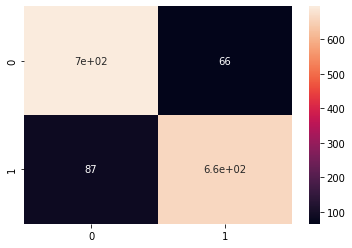

In [18]:
sns.heatmap(confusion_matrix,annot=True)

**Classification report**

In [21]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       761
           1       0.91      0.88      0.90       750

    accuracy                           0.90      1511
   macro avg       0.90      0.90      0.90      1511
weighted avg       0.90      0.90      0.90      1511



**Saving the Model using pickle**

In [20]:
import pickle
with open('mask_model.pickle','wb') as file:
  pickle.dump(model,file)

**Loading the saved model and predicting new data**

In [22]:
with open('mask_model.pickle','rb') as file:
  prediction_model=pickle.load(file)

**Image used for detection**

**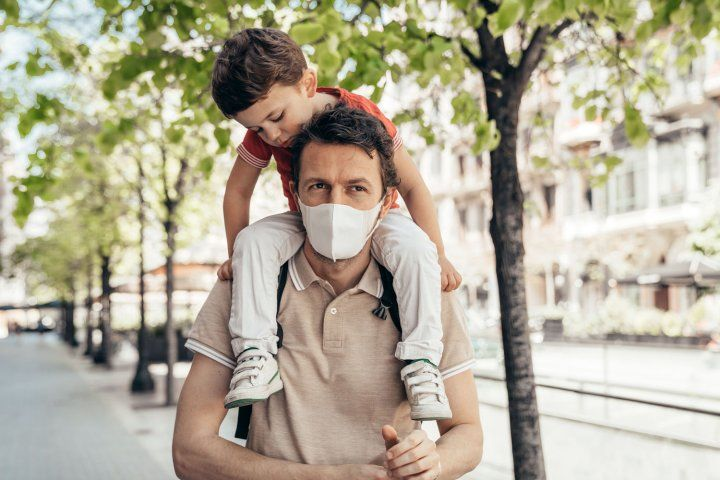**

In [29]:
#creating a prediction function for preprocessing and predicting new images
def detect(image_path):
  img=resize(imread(image_path),(150,150,3)).flatten()
  pred=prediction_model.predict([img])
  if pred[0]==0:
    print('mask detected')
  else:
    print('no mask')


In [30]:
detect('/content/Masks-father-son.jpg')

mask detected


**predicting image with no mask**

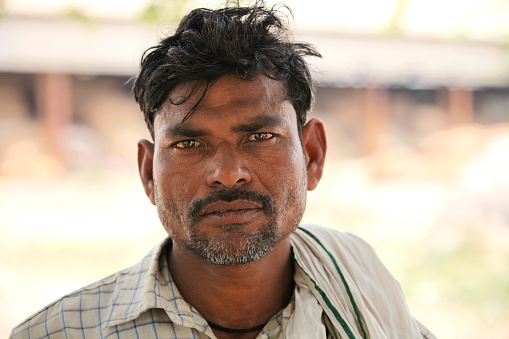

In [31]:
detect('/content/istockphoto-1158344437-170667a.jpg')

no mask
